# Can we find the best place to have a squirrel interaction?!?!?
### We will be visiting NYC and wish to have an opportunity to see some famously bold squirrels in Central Park.  We can use data to help answer our question.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initial data preparation

In [2]:
df = pd.read_csv('nyc_squirrels.csv')
df

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


In [3]:
df.isna().sum()

long                                             0
lat                                              0
unique_squirrel_id                               0
hectare                                          0
shift                                            0
date                                             0
hectare_squirrel_number                          0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1086
combination_of_primary_and_highlight_color       0
color_notes                                   2841
location                                        64
above_ground_sighter_measurement               114
specific_location                             2547
running                                          0
chasing                                          0
climbing                                         0
eating                                           0
foraging                       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   long                                        3023 non-null   float64
 1   lat                                         3023 non-null   float64
 2   unique_squirrel_id                          3023 non-null   object 
 3   hectare                                     3023 non-null   object 
 4   shift                                       3023 non-null   object 
 5   date                                        3023 non-null   int64  
 6   hectare_squirrel_number                     3023 non-null   int64  
 7   age                                         2902 non-null   object 
 8   primary_fur_color                           2968 non-null   object 
 9   highlight_fur_color                         1937 non-null   object 
 10  combination_

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long,3023.0,-7.396718e+01,0.007726,-7.398116e+01,-7.397310e+01,-7.396859e+01,-7.396019e+01,-7.394972e+01
lat,3023.0,4.078085e+01,0.010285,4.076491e+01,4.077168e+01,4.077817e+01,4.079122e+01,4.080012e+01
date,3023.0,1.011949e+07,42466.714959,1.006202e+07,1.008202e+07,1.012202e+07,1.014202e+07,1.020202e+07
hectare_squirrel_number,3023.0,4.123718e+00,3.096492,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,2.300000e+01
zip_codes,9.0,1.182822e+04,995.983782,1.009000e+04,1.208100e+04,1.242000e+04,1.242300e+04,1.242300e+04
community_districts,3023.0,1.899603e+01,0.234339,1.100000e+01,1.900000e+01,1.900000e+01,1.900000e+01,2.300000e+01
borough_boundaries,3023.0,4.000000e+00,0.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
city_council_districts,3023.0,1.907046e+01,1.352253,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,5.100000e+01
police_precincts,3023.0,1.300463e+01,0.224224,1.000000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.800000e+01


In [6]:
df = df.drop(['zip_codes'], axis = 1)

In [7]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

In [8]:
df_num

,long,lat,date,hectare_squirrel_number,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,10142018,3,19,4,19,13
1,-73.957044,40.794851,10062018,3,19,4,19,13
2,-73.976831,40.766718,10102018,3,19,4,19,13
3,-73.975725,40.769703,10182018,5,19,4,19,13
4,-73.959313,40.797533,10182018,1,19,4,19,13
...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,10072018,4,19,4,19,13
3019,-73.970402,40.782560,10132018,5,19,4,19,13
3020,-73.966587,40.783678,10122018,7,19,4,19,13
3021,-73.963994,40.789915,10102018,2,19,4,19,13


In [9]:
df_cat

,unique_squirrel_id,hectare,shift,age,primary_fur_color,highlight_fur_color,combination_of_primary_and_highlight_color,color_notes,location,above_ground_sighter_measurement,specific_location,other_activities,other_interactions,lat_long
0,37F-PM-1014-03,37F,PM,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.9561344937861 40.7940823884086)
1,37E-PM-1006-03,37E,PM,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Ground Plane,FALSE,NaN,NaN,me,POINT (-73.9570437717691 40.794850940803904)
2,2E-AM-1010-03,02E,AM,Adult,Cinnamon,NaN,Cinnamon+,NaN,Above Ground,4,NaN,NaN,NaN,POINT (-73.9768311751004 40.76671780725581)
3,5D-PM-1018-05,05D,PM,Juvenile,Gray,NaN,Gray+,NaN,Above Ground,3,NaN,NaN,NaN,POINT (-73.9757249834141 40.7697032606755)
4,39B-AM-1018-01,39B,AM,NaN,NaN,NaN,+,NaN,Above Ground,NaN,NaN,unknown,NaN,POINT (-73.9593126695714 40.797533370163)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,30B-AM-1007-04,30B,AM,Adult,Gray,NaN,Gray+,NaN,Ground Plane,FALSE,NaN,NaN,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,19A-PM-1013-05,19A,PM,Adult,Gray,White,Gray+White,NaN,Ground Plane,FALSE,NaN,NaN,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,22D-PM-1012-07,22D,PM,Adult,Gray,"Black, Cinnamon, White","Gray+Black, Cinnamon, White",NaN,Ground Plane,FALSE,NaN,NaN,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,29B-PM-1010-02,29B,PM,NaN,Gray,"Cinnamon, White","Gray+Cinnamon, White",NaN,Ground Plane,FALSE,NaN,NaN,NaN,POINT (-73.9639941227864 40.7899152327912)


In [10]:
df_cat.isna().sum()

unique_squirrel_id                               0
hectare                                          0
shift                                            0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1086
combination_of_primary_and_highlight_color       0
color_notes                                   2841
location                                        64
above_ground_sighter_measurement               114
specific_location                             2547
other_activities                              2586
other_interactions                            2783
lat_long                                         0
dtype: int64

In [11]:
df['location'].value_counts(dropna=False)

Ground Plane    2116
Above Ground     843
NaN               64
Name: location, dtype: int64

In [12]:
df['location'] = df['location'].fillna('Ground Plane')
df['location'].value_counts(dropna=False)

Ground Plane    2180
Above Ground     843
Name: location, dtype: int64

In [13]:
df['above_ground_sighter_measurement'].value_counts(dropna=False)
df['above_ground_sighter_measurement'] = df['above_ground_sighter_measurement'].fillna('FALSE')

In [14]:
df['above_ground_sighter_measurement'].value_counts(dropna=False)

FALSE    2230
10        116
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
7          19
50         19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: above_ground_sighter_measurement, dtype: int64

In [15]:
df['other_activities'].value_counts(dropna=False)

NaN                                                  2586
digging                                                19
sitting                                                16
walking                                                14
burying                                                12
                                                     ... 
looked like it was smelling/digging in the ground       1
running (from a dog)                                    1
jumping tree to tree                                    1
carrying nut away                                       1
eating (on branch)                                      1
Name: other_activities, Length: 308, dtype: int64

In [16]:
df['other_activities'] = df['other_activities'].fillna('No Activity')
df['other_activities'].value_counts(dropna=False)

No Activity                                          2586
digging                                                19
sitting                                                16
walking                                                14
burying                                                12
                                                     ... 
looked like it was smelling/digging in the ground       1
running (from a dog)                                    1
jumping tree to tree                                    1
carrying nut away                                       1
eating (on branch)                                      1
Name: other_activities, Length: 308, dtype: int64

In [17]:
df['other_interactions'] = df['other_interactions'].fillna('No Interactions')
df['other_interactions'].value_counts(dropna=False)

No Interactions                       2783
runs from (dog)                          9
curious                                  6
runs from (me)                           5
stared                                   4
                                      ... 
climbing                                 1
ran two feet up tree trunk               1
scared                                   1
runs from (kids kicking the fence)       1
scolding                                 1
Name: other_interactions, Length: 198, dtype: int64

In [18]:
df['color_notes'].value_counts(dropna=False)

NaN                                                                                                                2841
Gray & Cinnamon selected as Primary. White selected as Highlights. Made executive adjustments.                        9
white belly                                                                                                           5
White tail                                                                                                            4
Gray & Cinnamon selected as Primary. Nothing selected as Highlights. Made executive adjustments.                      4
                                                                                                                   ... 
Drawing included on tally sheet                                                                                       1
Black & Cinnamon selected as Primary. White selected as Highlights. Made executive adjustments.                       1
very long tail                          

In [19]:
df['specific_location'].value_counts(dropna=False)

NaN                                           2547
tree                                            43
in tree                                         32
on fence                                         8
Tree                                             7
                                              ... 
Was on top of the edge of Bow Bridge             1
Gathering/digging in grassy area b/w trees       1
hanging upside down to get a nut                 1
running on rocks                                 1
Across Transverse                                1
Name: specific_location, Length: 305, dtype: int64

In [20]:
#columns to drop, too many NaN values
cols_drop = ['color_notes','specific_location']

In [21]:
df['age'].value_counts(dropna=False)

Adult       2568
Juvenile     330
NaN          121
?              4
Name: age, dtype: int64

In [22]:
df['age'] = df['age'].fillna('Adult')
df.loc[df['age'] == '?', 'age'] = 'Adult'
df['age'].value_counts(dropna = False)

Adult       2693
Juvenile     330
Name: age, dtype: int64

In [23]:
df['primary_fur_color'].value_counts(dropna=False)

Gray        2473
Cinnamon     392
Black        103
NaN           55
Name: primary_fur_color, dtype: int64

In [24]:
df['primary_fur_color'] = df['primary_fur_color'].fillna('Gray')
df['primary_fur_color'].value_counts(dropna=False)

Gray        2528
Cinnamon     392
Black        103
Name: primary_fur_color, dtype: int64

In [25]:
df['combination_of_primary_and_highlight_color'].value_counts()

Gray+                          895
Gray+Cinnamon                  752
Gray+White                     489
Gray+Cinnamon, White           265
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       62
Cinnamon+Gray, White            58
+                               55
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Black+Cinnamon, White            3
Cinnamon+Black, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: combination_of_primary_and_highlight_color, dtype: int64

In [26]:
df.loc[df['combination_of_primary_and_highlight_color'] == '+', 'combination_of_primary_and_highlight_color'] = 'Gray+'
df['combination_of_primary_and_highlight_color'].value_counts()

Gray+                          950
Gray+Cinnamon                  752
Gray+White                     489
Gray+Cinnamon, White           265
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       62
Cinnamon+Gray, White            58
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Black+Cinnamon, White            3
Cinnamon+Black, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: combination_of_primary_and_highlight_color, dtype: int64

In [27]:
df['highlight_fur_color'] = df['highlight_fur_color'].fillna('No Highlight')
df['highlight_fur_color'].value_counts(dropna=False)

No Highlight              1086
Cinnamon                   767
White                      585
Cinnamon, White            268
Gray                       170
Gray, White                 59
Black                       34
Black, Cinnamon, White      32
Black, White                10
Black, Cinnamon              9
Gray, Black                  3
Name: highlight_fur_color, dtype: int64

In [28]:
df = df.drop(cols_drop, axis=1)
df.isna().sum()

long                                          0
lat                                           0
unique_squirrel_id                            0
hectare                                       0
shift                                         0
date                                          0
hectare_squirrel_number                       0
age                                           0
primary_fur_color                             0
highlight_fur_color                           0
combination_of_primary_and_highlight_color    0
location                                      0
above_ground_sighter_measurement              0
running                                       0
chasing                                       0
climbing                                      0
eating                                        0
foraging                                      0
other_activities                              0
kuks                                          0
quaas                                   

In [29]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

In [30]:
df['date'].dtypes
df['date'] = df['date'].astype(str)

In [31]:
df['date'] = pd.to_datetime(df['date'], format='%m%d%Y')

In [32]:
df.head()

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,tail_twitches,approaches,indifferent,runs_from,other_interactions,lat_long,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,Adult,Gray,No Highlight,...,False,False,False,False,No Interactions,POINT (-73.9561344937861 40.7940823884086),19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,2018-10-06,3,Adult,Gray,Cinnamon,...,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,2018-10-10,3,Adult,Cinnamon,No Highlight,...,False,False,True,False,No Interactions,POINT (-73.9768311751004 40.76671780725581),19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,2018-10-18,5,Juvenile,Gray,No Highlight,...,False,False,False,True,No Interactions,POINT (-73.9757249834141 40.7697032606755),19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,2018-10-18,1,Adult,Gray,No Highlight,...,False,False,False,False,No Interactions,POINT (-73.9593126695714 40.797533370163),19,4,19,13


## Save our clean dataset to a .csv file

In [33]:
df.to_csv('squirrelsNYC.csv', index=False)

# EDA (Exploratory Data Analysis)

In [34]:
df[['running', 'chasing','climbing', 'eating', 'foraging']] = df[['running', 'chasing','climbing', 'eating', 'foraging']].astype(int)

In [35]:
df[['kuks', 'quaas','moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent','runs_from']] = df[['kuks', 'quaas',
       'moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent',
       'runs_from']].astype(int)

# Squirrel Sightings in Central Park

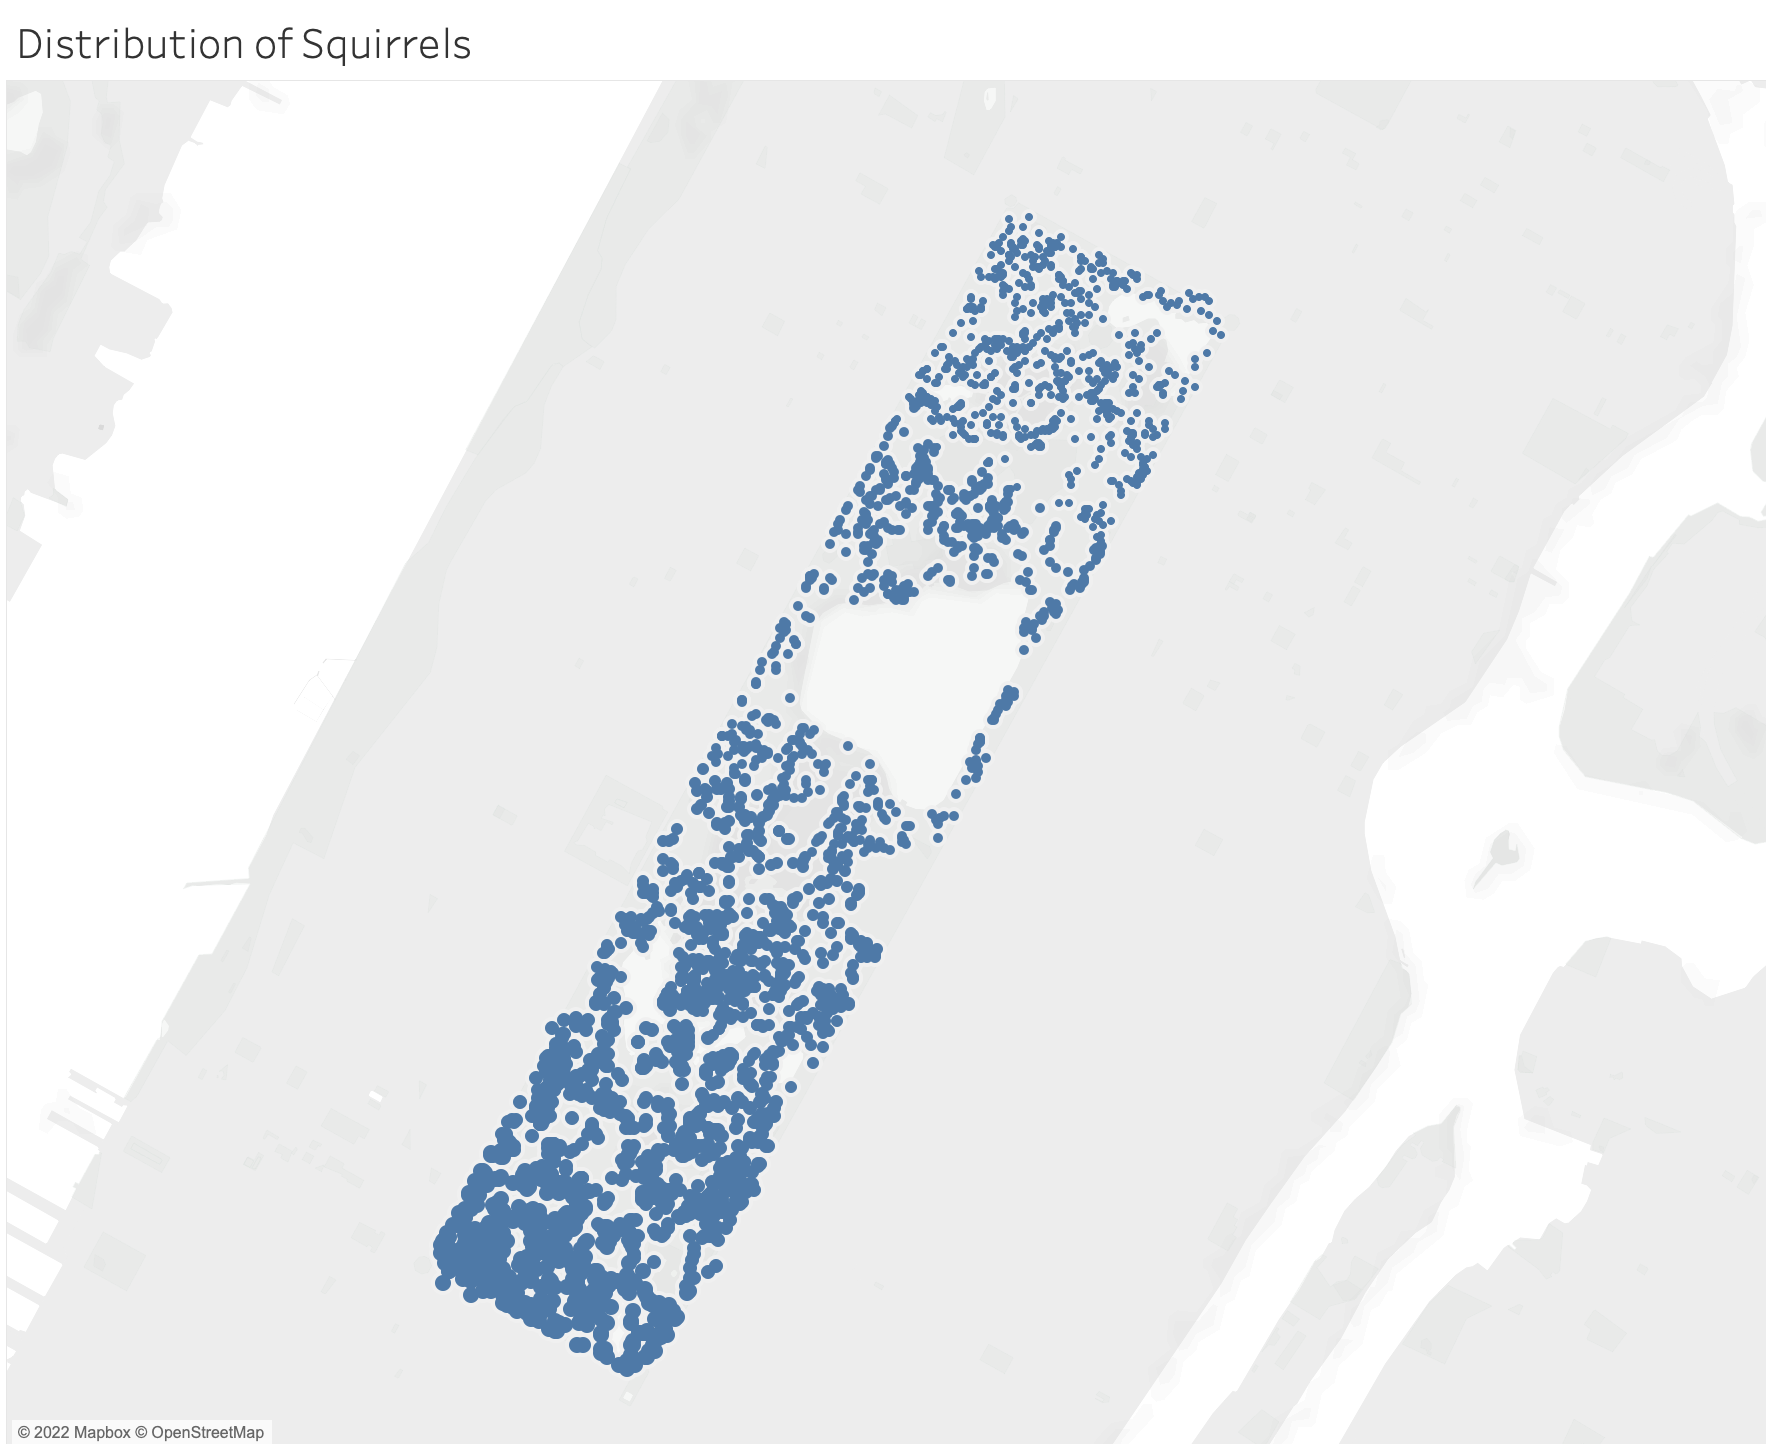

# Age of Squirrels

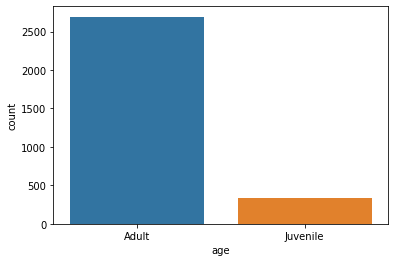

In [36]:
fig,ax = plt.subplots()
sns.countplot(data=df, x='age')
plt.show()

# Distribution of Main Colorings

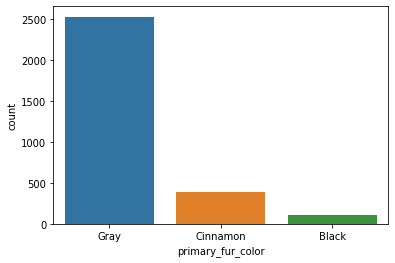

In [37]:
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(data=df, x='primary_fur_color')
plt.show()

# Where does each color gang hang out?

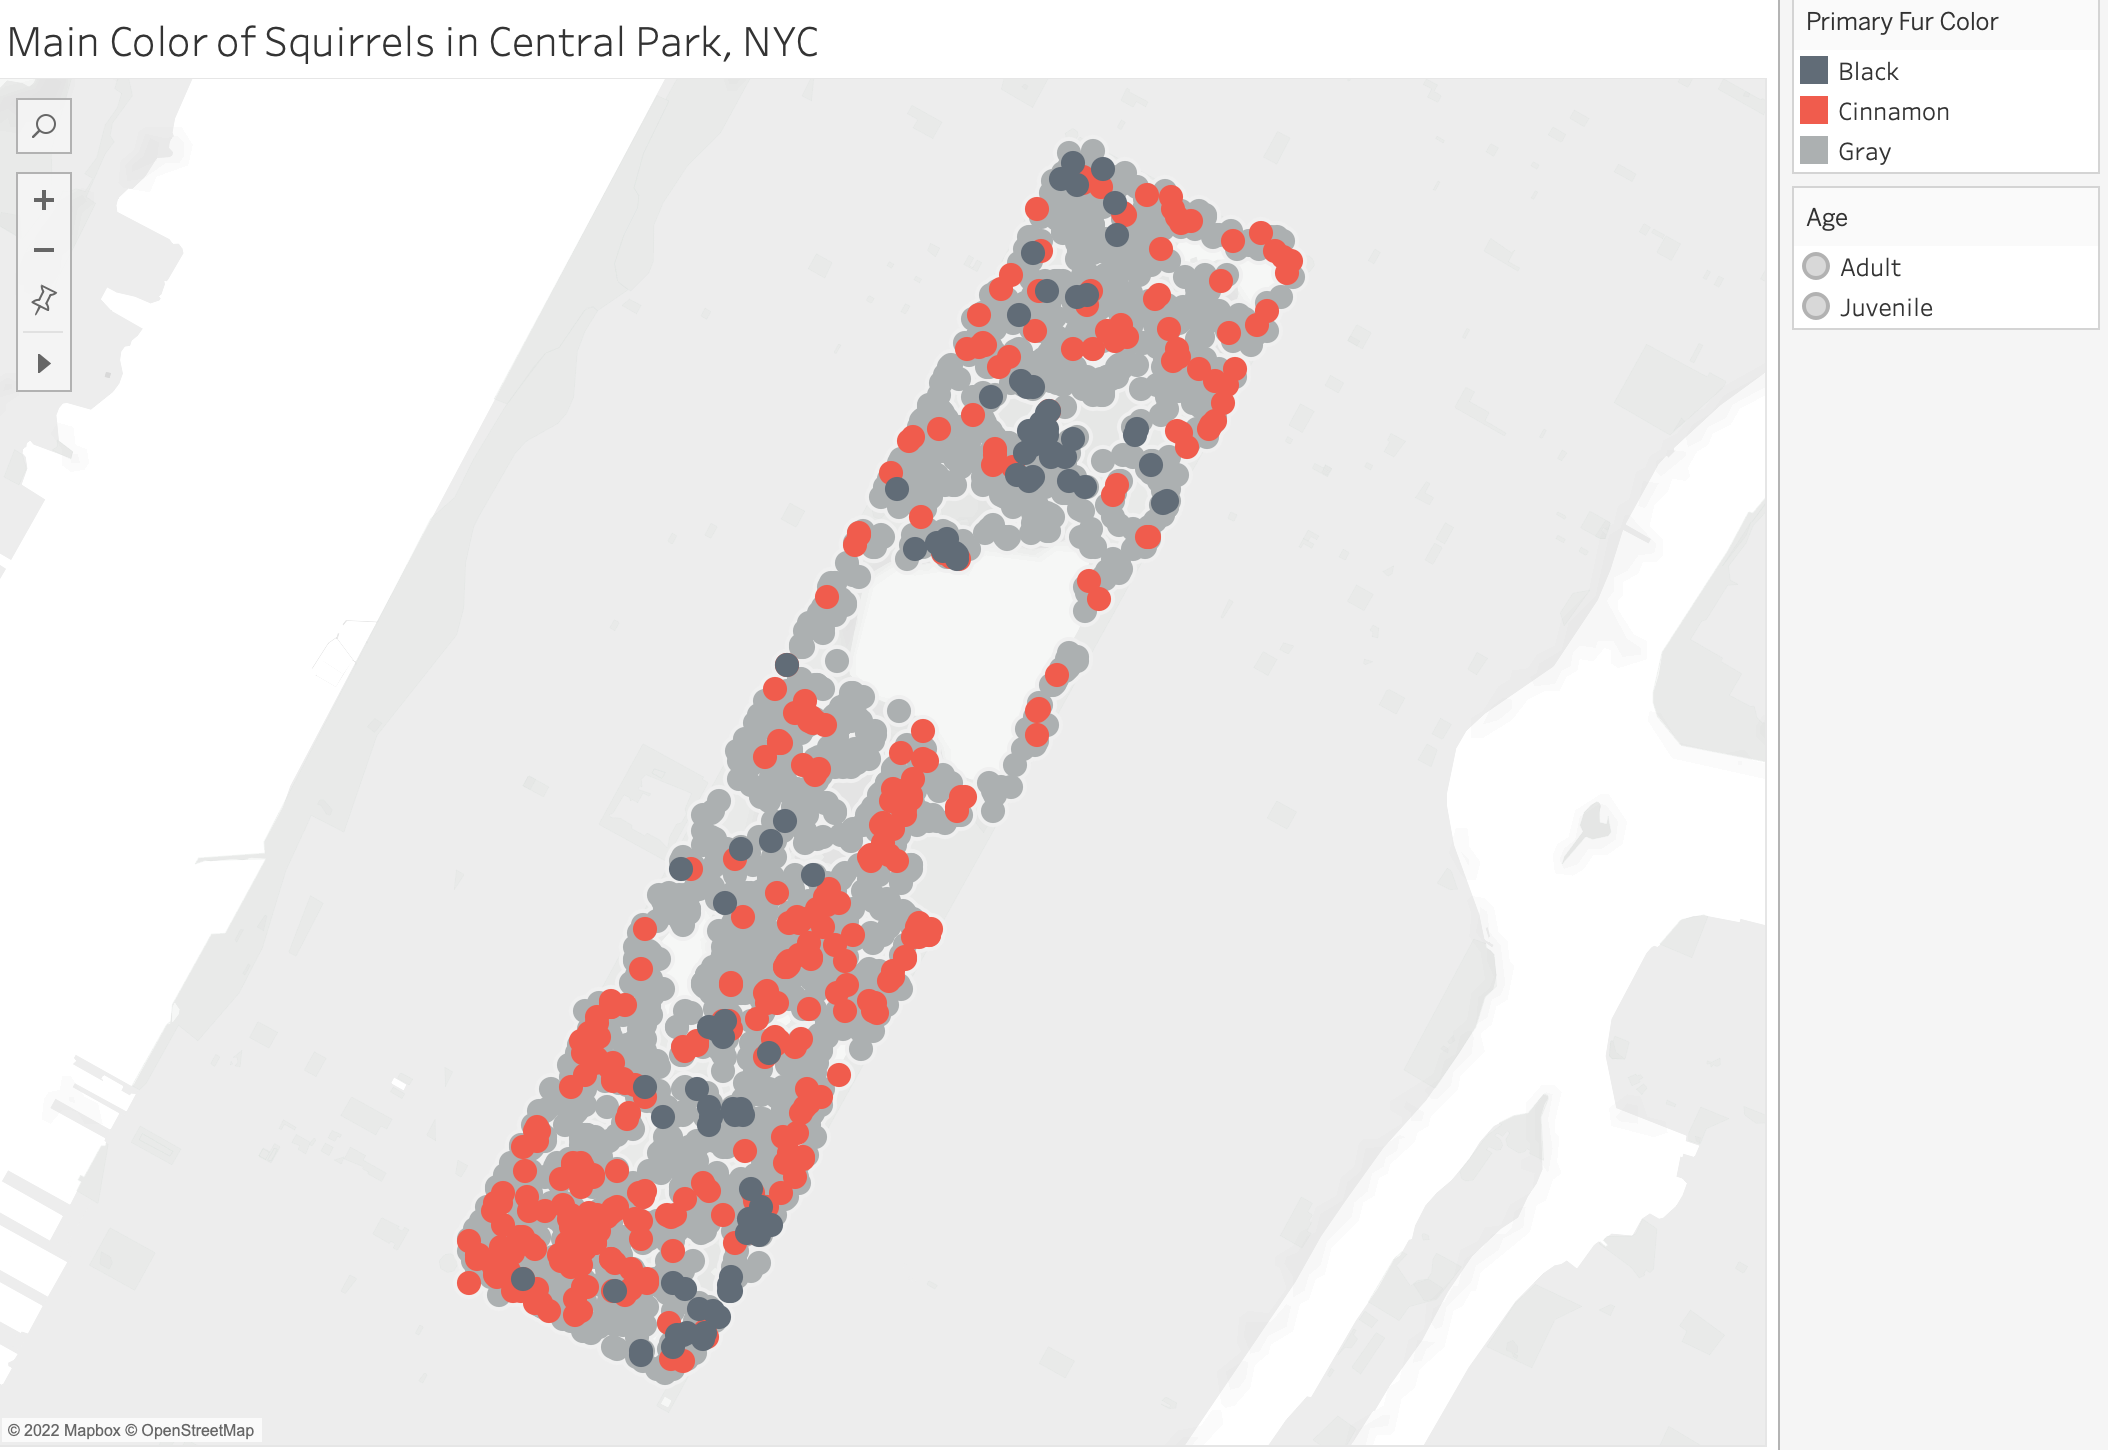

# Distribution of Highlight colorings

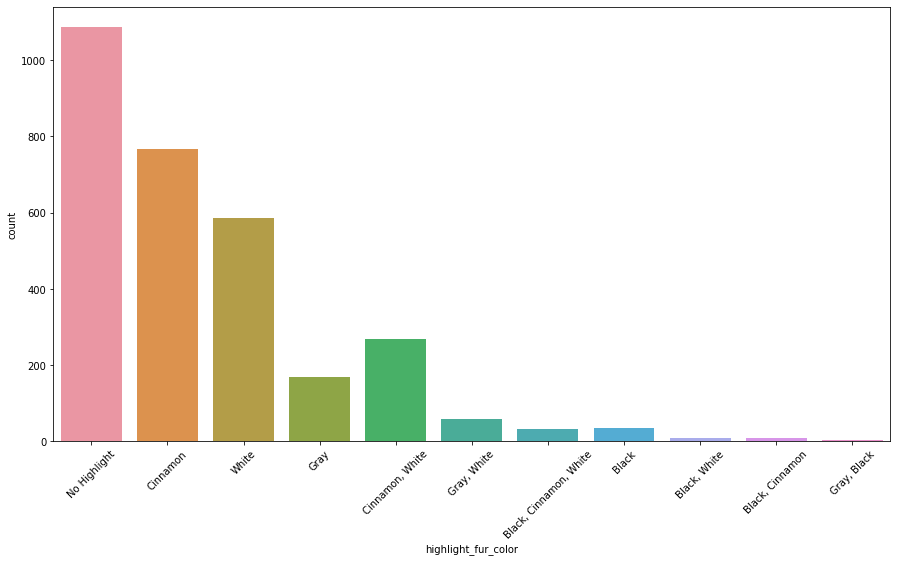

In [38]:
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(data=df, x='highlight_fur_color')
plt.xticks(rotation=45)
plt.show()

# What color combinations am I most likely to see?

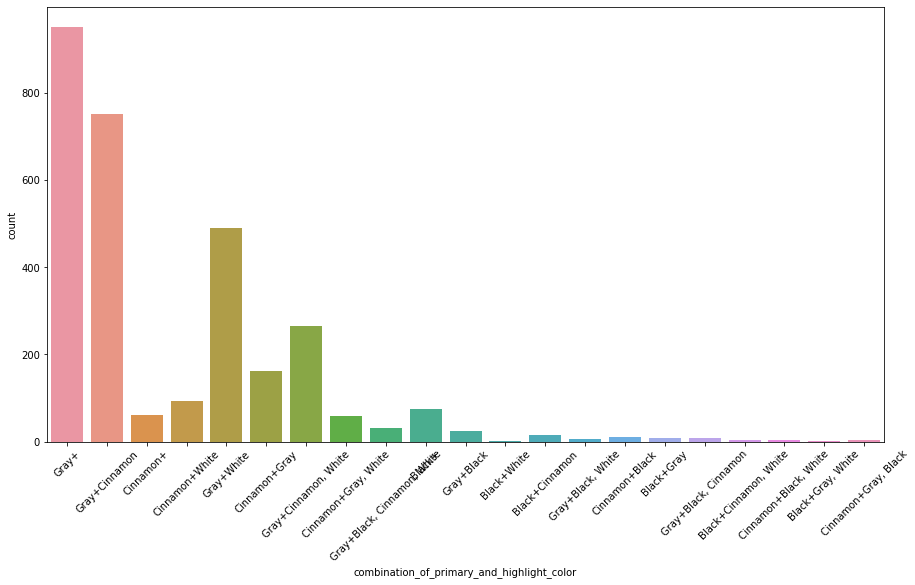

In [39]:
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(data=df, x='combination_of_primary_and_highlight_color')
plt.xticks(rotation=45)
plt.show()

# What type of tail movements will I see?

In [40]:
df_group0 = df.groupby('age').agg({'tail_twitches':'mean', 'tail_flags':'mean'})

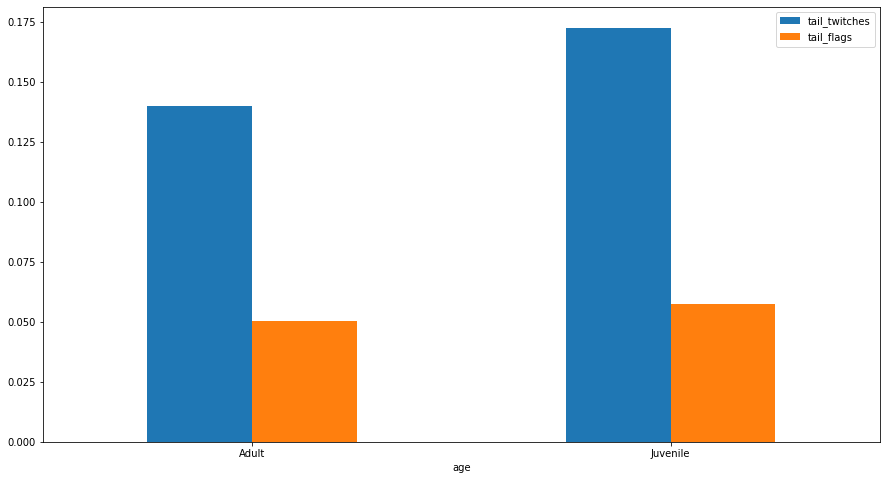

In [41]:
df_group0.plot(kind='bar')
plt.xticks(rotation=360);

# Should I be focusing more on the ground or in the trees?

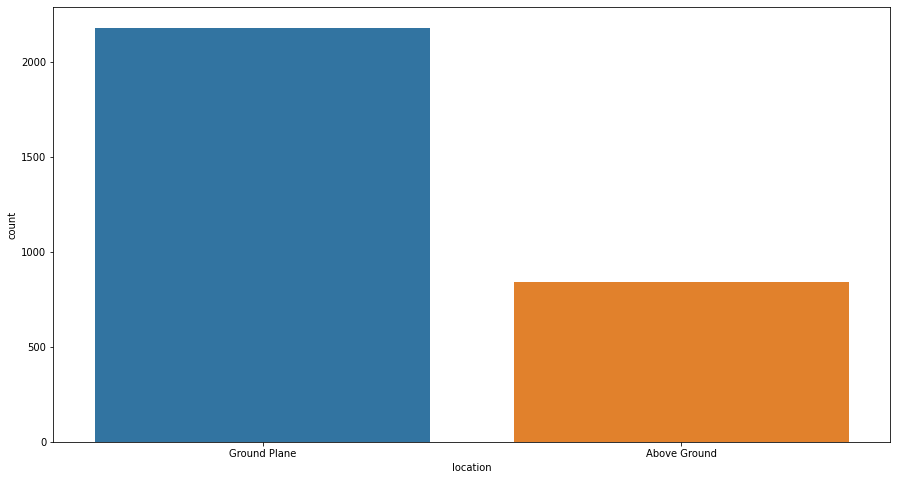

In [42]:
fig,ax = plt.subplots()
sns.countplot(data=df, x='location')
plt.show()

# What activities will they be doing?

In [43]:
df_group = df.groupby('location').agg({'running':'sum', 'chasing':'sum', 'climbing':'sum', 'eating':'sum', 'foraging':'sum'})

In [44]:
df_group

,running,chasing,climbing,eating,foraging
location,,,,,
Above Ground,165,101,520,155,137
Ground Plane,565,178,138,605,1298


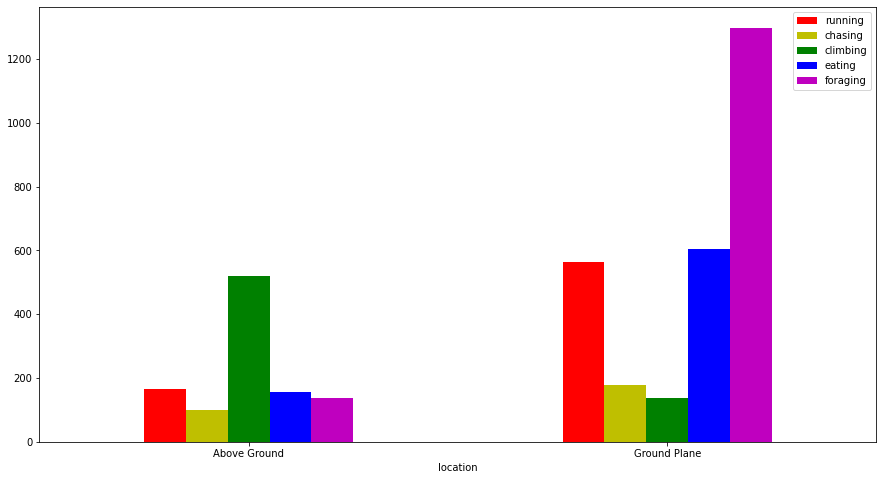

In [45]:
df_group.plot(kind='bar', color='rygbm')
plt.xticks(rotation=360);

In [46]:
df_group2 = df.groupby('shift').agg({'running':'sum','chasing':'sum','climbing':'sum','eating':'sum','foraging':'sum'})

(array([0, 1]), [Text(0, 0, 'AM'), Text(1, 0, 'PM')])

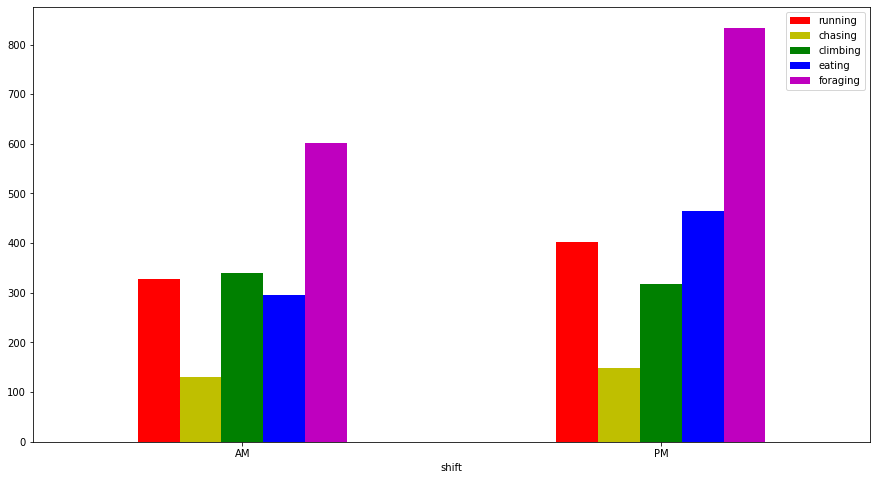

In [47]:
df_group2.plot(kind='bar', color='rygbm')
plt.xticks(rotation=360)

# Will I be able to hear any vocalizations?

In [48]:
df_group3 = df.groupby('shift').agg({'kuks':'sum', 'quaas':'sum', 'moans':'sum'})

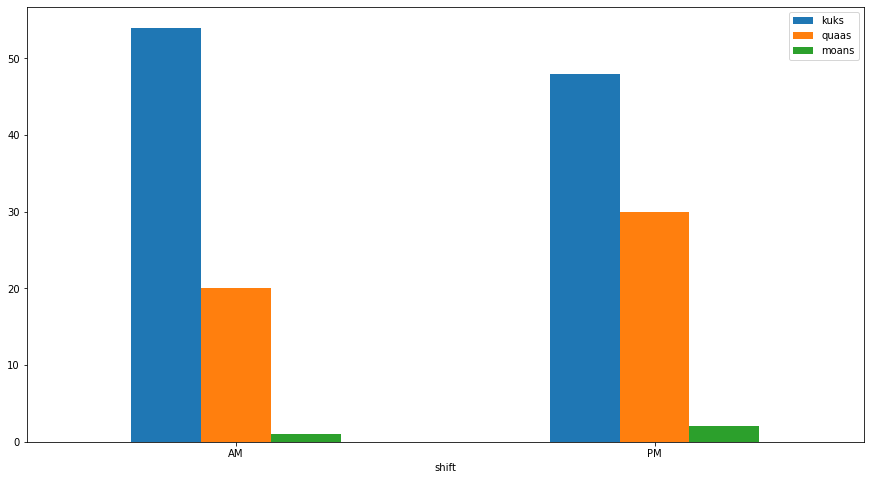

In [49]:
df_group3.plot(kind='bar')
plt.xticks(rotation=360);

# Should I focus on listening to Adults or Juveniles?

In [50]:
df_group4 = df.groupby('age').agg({'kuks':'mean', 'quaas':'mean', 'moans':'mean'})

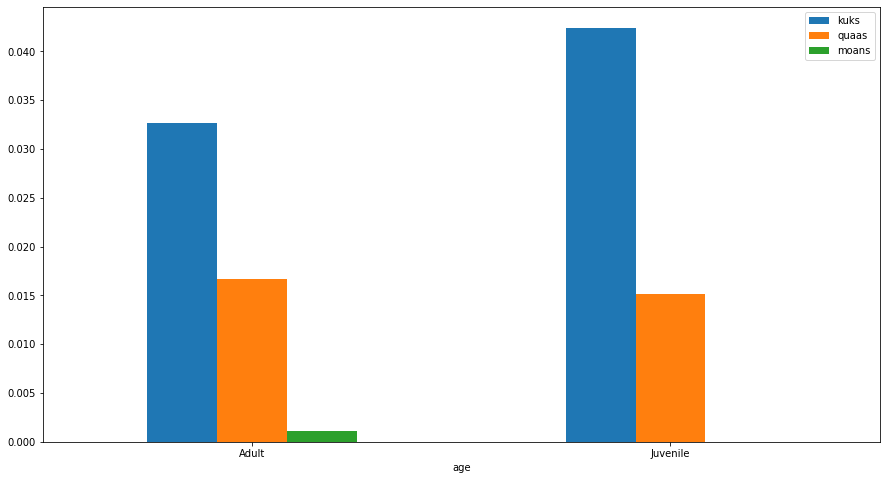

In [51]:
df_group4.plot(kind='bar')
plt.xticks(rotation=360);

In [52]:
df_group5 = df.groupby('age').agg({'approaches':'mean', 'indifferent':'mean', 'runs_from':'mean',})

(array([0, 1]), [Text(0, 0, 'Adult'), Text(1, 0, 'Juvenile')])

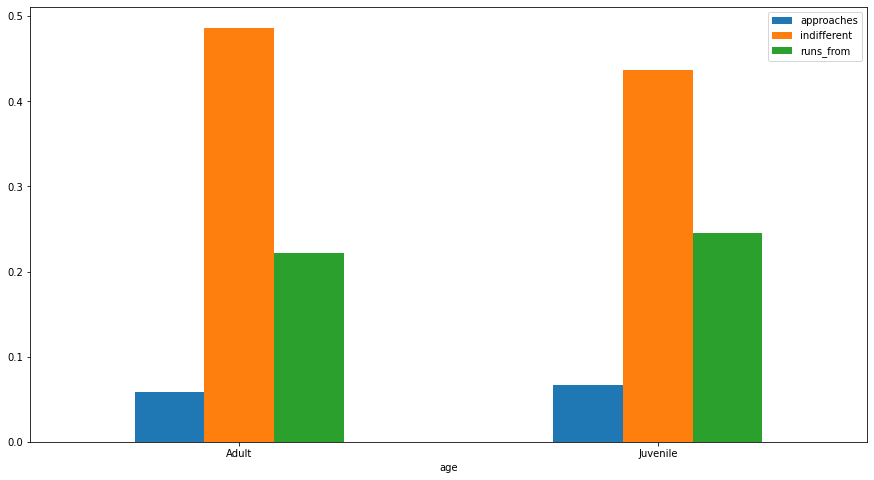

In [53]:
df_group5.plot(kind='bar')
plt.xticks(rotation=360);

# Will the squirrels actually interact with me?

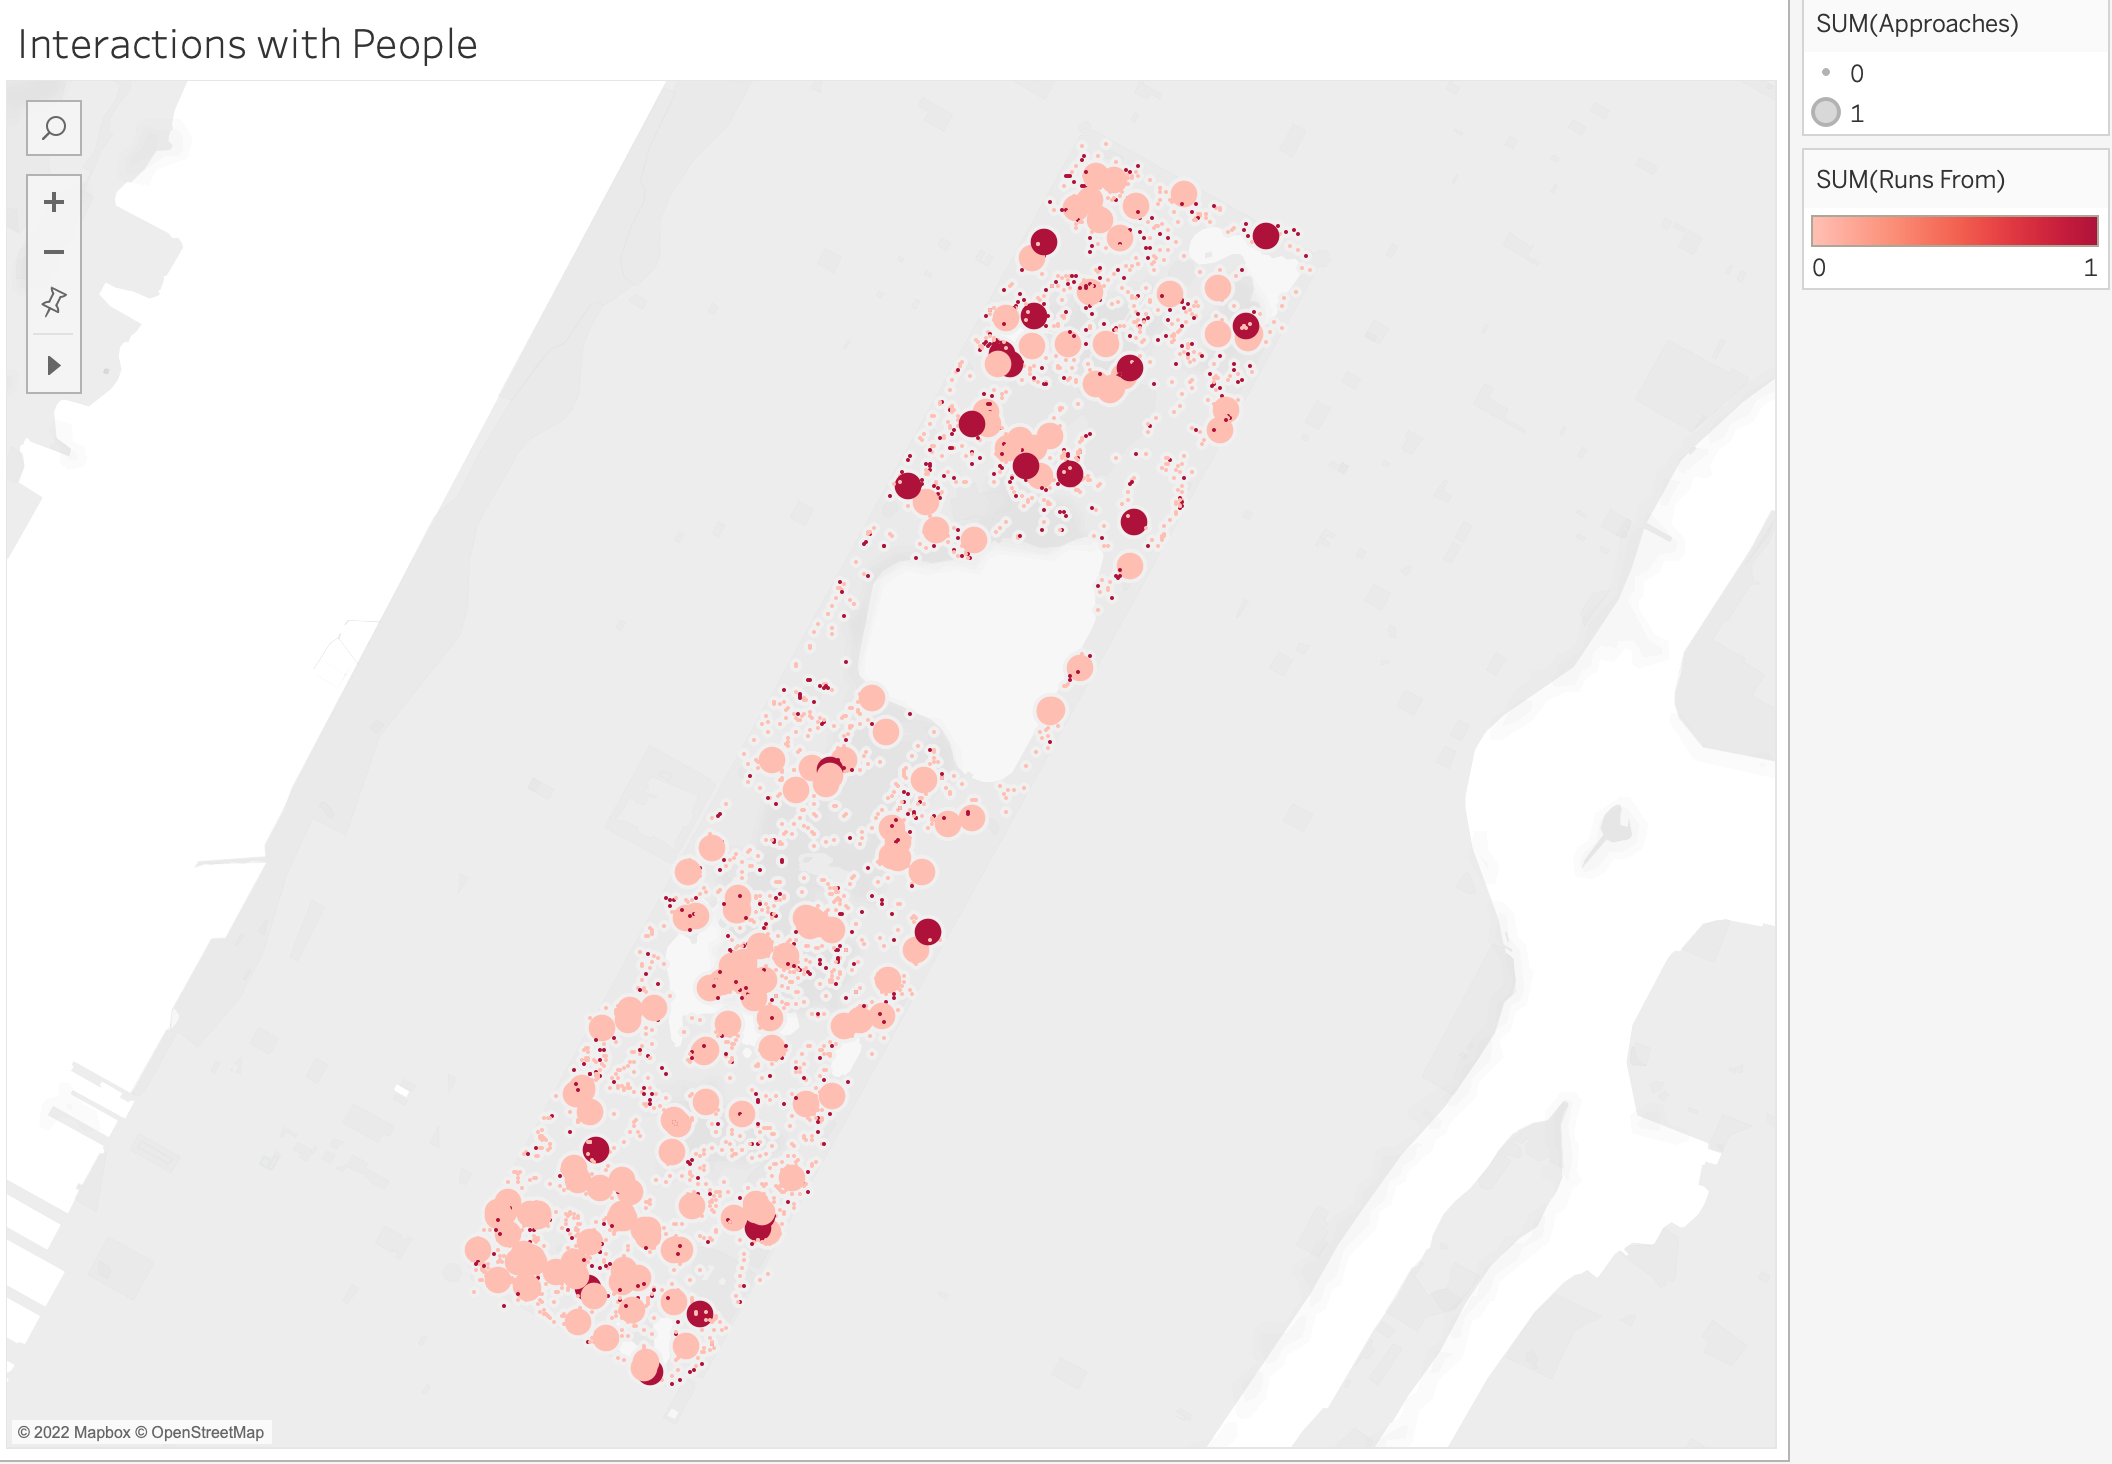

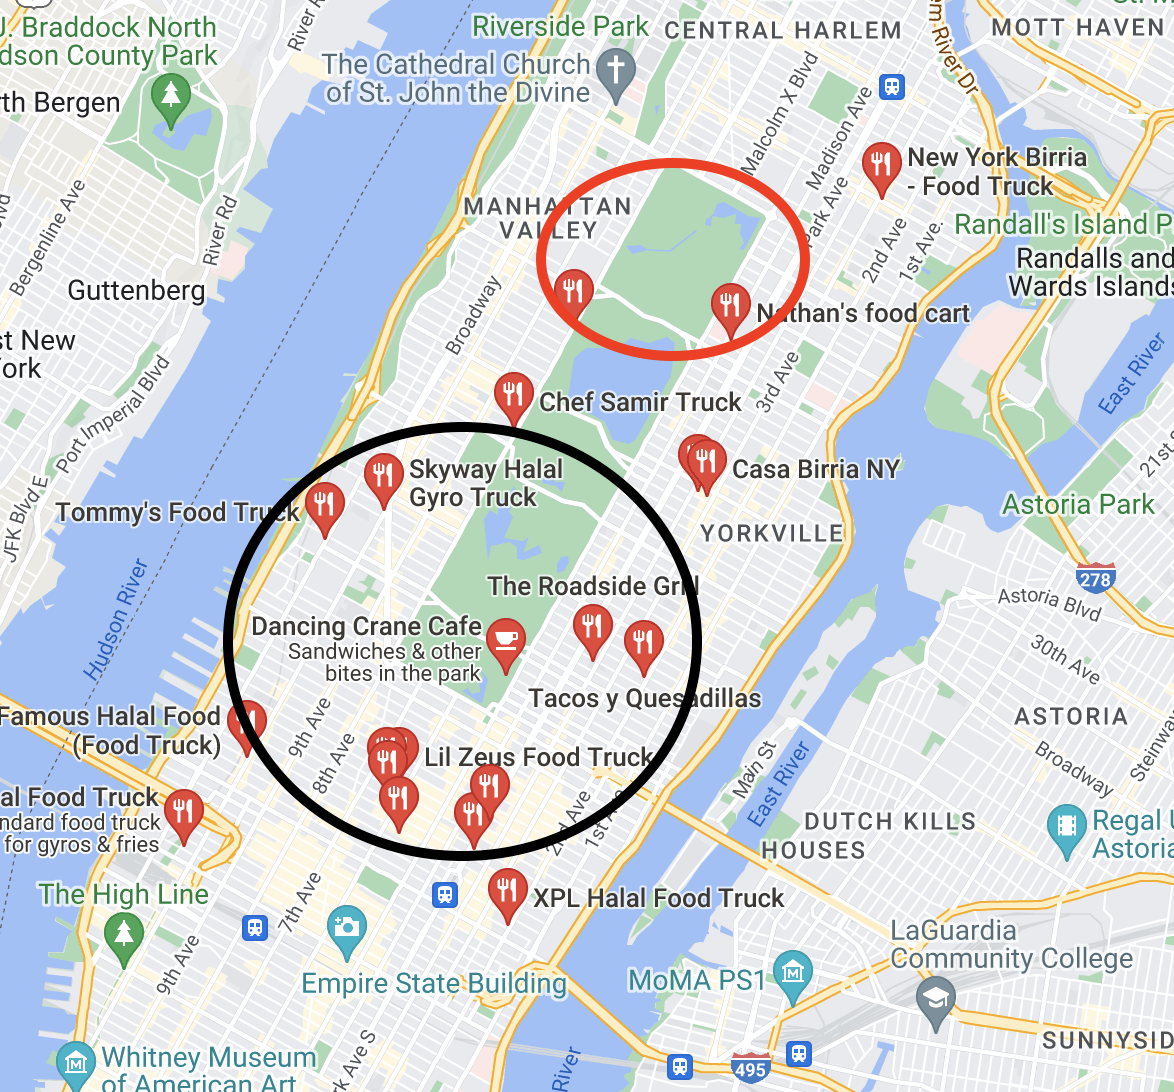

# Can we answer our initial question?
## Can we find the best place to have a squirrel interaction?!?!?

### At this point, we would consider a Machine Learning model to try and predict something that cannot be analyzed using visualizations. 
### However, our initial question of finding the best place for squirrel interactions can be gleaned from the visualizations.  So a model is not necessary.  
### I would suggest that you purchase some food from a snack truck and enter the park at the South entrance.  Choose a lovely place to set up a picnic and wait for the ensuing squirrel action!